In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
from PIL import Image 
import numpy as np 
from imageProcessing import *


# SIFT 

Space Invariant Feature Transform

Method of detecting features that is invariant to scaling and rotations. Usefull for finding same feature across images. 

As we want to recognize the hand, we utilize an image of our hand in the "end effector" gesture. 


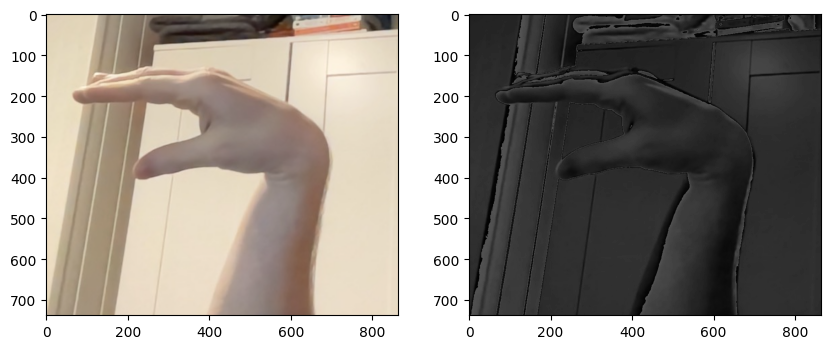

In [44]:

path = "./hand.png"
I = Image.open(path)
I = np.array(I)
I_hand = I
I_gray = np.uint8(rgb_to_gray(I))

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1,2,1)
plt.imshow(I)
fig.add_subplot(1,2,2)
plt.imshow(I_gray, cmap="gray", vmin=0, vmax=255)

## Step 1 - Detecting points of interest 

We use the difference of Gaussians (DoG) in to find points that seem stable and recognizable. 

This is simply done by applying gaussian filter of different scales to the image and subtracting them pairwise. 

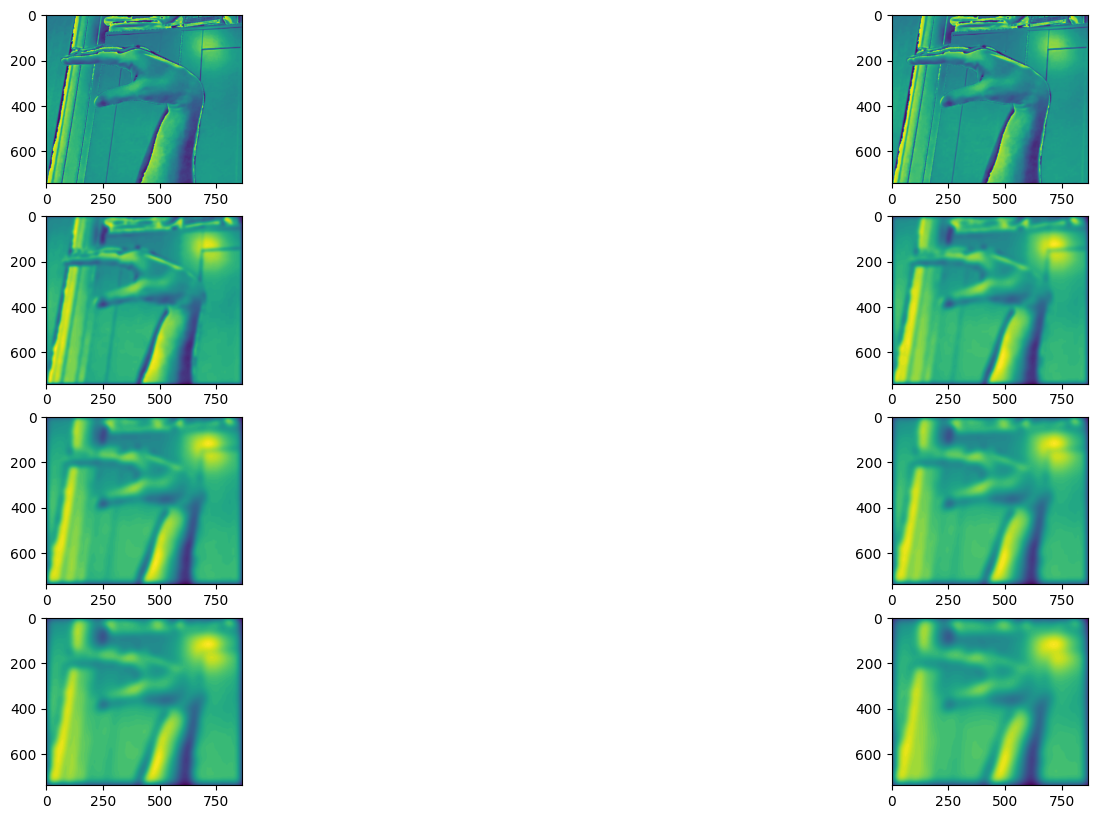

In [45]:

I = I_gray

I_gauss_1 = gaussian(I, 0.5)
I_gauss_3 = gaussian(I, 1)
I_gauss_7 = gaussian(I, 7)
I_gauss_10 = gaussian(I, 10)

I_gauss_13 = gaussian(I, 13)
I_gauss_15 = gaussian(I, 15)
I_gauss_17 = gaussian(I, 17)
I_gauss_20 = gaussian(I, 20)


fig = plt.figure(figsize=(20,10))
fig.add_subplot(4,2,1)
plt.imshow(I_gauss_1)
fig.add_subplot(4,2,2)
plt.imshow(I_gauss_3)
fig.add_subplot(4,2,3)
plt.imshow(I_gauss_7)
fig.add_subplot(4,2,4)
plt.imshow(I_gauss_10)

fig.add_subplot(4,2,5)
plt.imshow(I_gauss_13)
fig.add_subplot(4,2,6)
plt.imshow(I_gauss_15)
fig.add_subplot(4,2,7)
plt.imshow(I_gauss_17)
fig.add_subplot(4,2,8)
plt.imshow(I_gauss_20)


### DoG Images

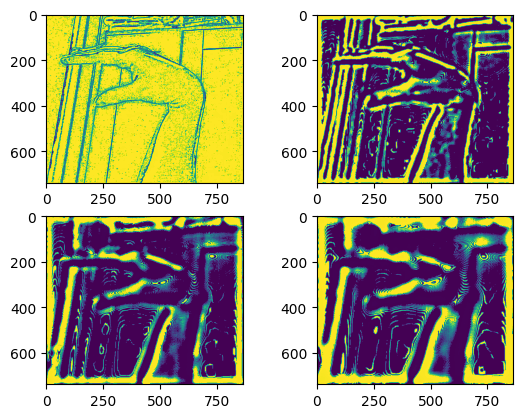

In [46]:
IG31 = I_gauss_3 - I_gauss_1 
IG107 = I_gauss_10 - I_gauss_7

IG1513 = I_gauss_15 - I_gauss_13
IG2017 = I_gauss_20 - I_gauss_17

fig = plt.figure()
fig.add_subplot(2,2,1)
plt.imshow(IG31)
fig.add_subplot(2,2,2)
plt.imshow(IG107)
fig.add_subplot(2,2,3)
plt.imshow(IG1513)
fig.add_subplot(2,2,4)
plt.imshow(IG2017)

## Retrieving points of interest from DoG 

In [47]:
IP1_y, IP1_x = extract_local_maxima(IG31, 0.6, max_number=False)
IP2_y, IP2_x = extract_local_maxima(IG107, 0.6, max_number=False)
IP3_y, IP3_x = extract_local_maxima(IG1513, 0.6, max_number=False)
IP4_y, IP4_x = extract_local_maxima(IG2017, 0.6, max_number=False)

### Plotting all interest points


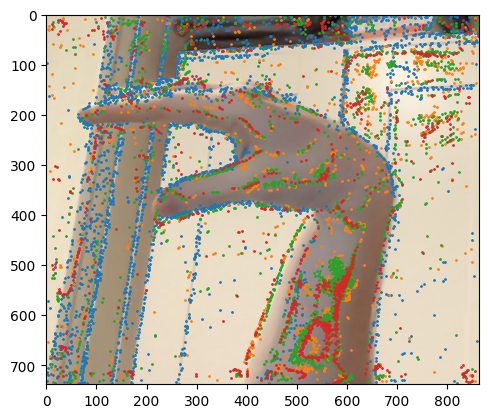

In [48]:
plt.imshow(I_hand)
plt.scatter(IP1_x, IP1_y, s=1)
plt.scatter(IP2_x, IP2_y, s=1)
plt.scatter(IP3_x, IP3_y, s=1)
plt.scatter(IP4_x, IP4_y, s=1)

### Plotting only intersecting interest points

In [49]:
set_1 = set(zip(IP1_x, IP1_y))
set_2 = set(zip(IP2_x, IP2_y))
set_3 = set(zip(IP3_x, IP3_y))
set_4 = set(zip(IP4_x, IP4_y))

common = set_1 & set_2 & set_3 & set_4
print(common)
common_x, common_y = zip(*common)

plt.imshow(I_hand)
plt.scatter(common_x, common_y, s=1)

set()


ValueError: not enough values to unpack (expected 2, got 0)

# OpenCV SIFT Implementation

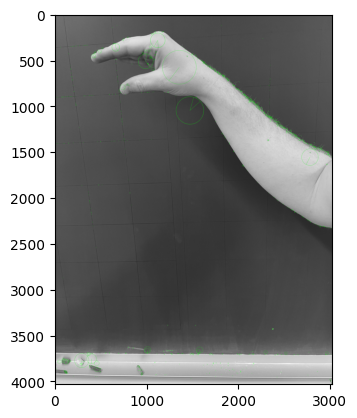

(<matplotlib.image.AxesImage at 0x10aad7670>, None)

In [20]:
import numpy as np
import cv2 as cv
img = cv.imread('./img/IMG_3339.JPG')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
orb = cv.ORB.create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img, color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img), plt.show()


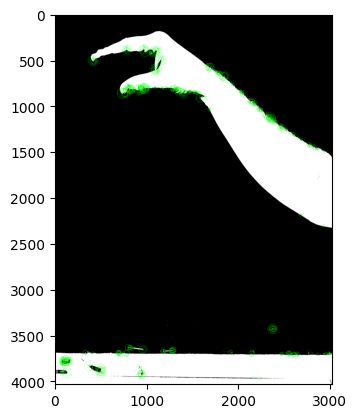

(<matplotlib.image.AxesImage at 0x14f4381c0>, None)

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('./img/IMG_3339.JPG', cv.IMREAD_GRAYSCALE)
thresh = 127
img = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)[1]
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
thresh = 127
original_img1 = cv.imread('./hand.png')
original_img2 = cv.imread('./img/IMG_3339.JPG')
img1 = cv.imread('./hand.png',cv.IMREAD_GRAYSCALE)
img1 = cv.threshold(img1, thresh, 255, cv.THRESH_BINARY)[1]         # queryImage
img2 = cv.imread('./img/IMG_3339.JPG',cv.IMREAD_GRAYSCALE) # trainImage
img2 = cv.threshold(img2, thresh, 255, cv.THRESH_BINARY)[1]
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

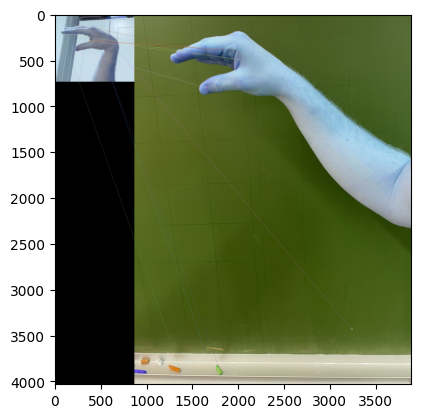

(<matplotlib.image.AxesImage at 0x14f5bf610>, None)

In [35]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(original_img1,kp1,original_img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()